### typing TypedDict, Pydantic Basemodel 이해하기

In [ ]:
from typing import TypedDict # TypedDict: 그냥 딕셔너리로 봐도 무방. 타입힌트만 제공. 

class User(TypedDict):
    id: int
    name: str
    email: str

user1 = User(**{'id':1, 'name': 'jinwoo', 'email': 'fastcam123.com'}) 
print(user1)

user1: User = { # : User -> 무시해도 상관 없음, 그저 타입 참고를 위한 힌트로 작성.
    'id': 1,
    'name': 'nayeon_park',
    'email': 'uoahvu@gmail.com'
}
print(user1)

# user2 = User()
# user2.id = 1
# user2.name = 'jenifer'
# user2.email = '1234@navor.com'
# print(user2)
# -> 오류 발생, 일반클래스 에서나 접근 가능한 방법

# user3 = User(*[2, 'eujin', 'fastcampus.com'])
# print(user3)
# -> 오류, 딕셔너리 타입의 언패킹 방식이 아니라 인자값이 전달되지 못함.


{'id': 1, 'name': 'jinwoo', 'email': 'fastcam123.com'}
{'id': 1, 'name': 'nayeon_park', 'email': 'uoahvu@gmail.com'}


In [ ]:
user1: User = {
    'id': 1,
    'name': 666,
    'email': 'uoahvu@gmail.com'
}
print(user1)

# 오류가 나지 않고 시행됨, TypedDict는 타입힌트를 제공하지만 적절성 유무는 평가하지 않기 때문.

{'id': 1, 'name': 666, 'email': 'uoahvu@gmail.com'}


In [ ]:
from pydantic import BaseModel

class User(BaseModel):
    id: int
    name: str
    email: str

user_data = {
    'id': 2,
    'name': 'john',
    'email': 'campus@12.com'
}

user2 = User(**user_data)
print(dict(user2))
# print(type(user2))

user2: User = {
    'id': 2,
    'name': 'john',
    'email': 'campus@12.com'
}
print(user2)

{'id': 2, 'name': 'john', 'email': 'campus@12.com'}
<class '__main__.User'>
{'id': 2, 'name': 'john', 'email': 'campus@12.com'}


In [ ]:
# user_data = {
#     'id': 2,
#     'name': 45,
#     'email': 'campus@12.com'
# }

# user2 = User(**user_data)
# print(user2)

# pydantic에선 처음 정의시 name은 문자열로 힌트 제공했으나 인트 타입이 명시되면서 유효성 검사에서 오류 발생 

## State(상태)

- 상태를 나타내는 데이터 구조
- 각 노드에서 처리할 정보를 담아 다른 노드로 보내는 정보통

In [1]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

# 입력을 위한 스키마(데이터 구조) 정의
class InputState(TypedDict):
    question: str

# 출력을 위한 스키마 정의
class OutputState(TypedDict):
    answer: str

# 입출력 종합 스키마 정의
class Input_Output(InputState, OutputState):
    pass

# 입력을 처리하고 답변을 생성하는 노드를 생성하자.
def answer_node(state: Input_Output) -> dict:
    # return {'question': InputState['question'], 'answer': 'bye~'}
    # return {'question': state['question'], 'answer': 'bye~'}
    return {'answer': 'bye~'}

# Input_output 는 입출력을 위한 스키마들을 상속
# 그 형태는 딕셔너리다.(TypedDict 상속해 재 상속)

graph_builder = StateGraph(Input_Output)
graph_builder.add_node('reply',answer_node)
graph_builder.add_edge(START, 'reply')
graph_builder.add_edge('reply', END)
graph = graph_builder.compile()

print(graph.invoke({'question': 'hi!'}))

{'question': 'hi!', 'answer': 'bye~'}


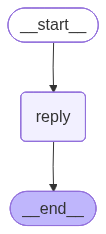

In [36]:
graph

## 상태 - Reducer 지정하기

- 기존 상태 + 새 상태 → 하나로 합침(이어 붙임.)
- 일종의 관리 메커니즘

In [ ]:
# 리듀서가 지정된 경우
from typing_extensions import TypedDict

class State(TypedDict):
    value1: int
    value2: list[str] # 리스트 안에 있는 값들의 타입이 문자열이다

In [2]:
# 리듀서가 지정된 경우
from typing_extensions import TypedDict, Annotated
from operator import add

class State(TypedDict):
    value1: int
    value2: Annotated[list[str], add]

In [3]:
# 리듀서가 지정된 경우(커스터마이징)
from typing_extensions import TypedDict, Annotated
# from operator import add

def add(left, right):
    return left + right

class State(TypedDict):
    value1: int
    value2: Annotated[list[str], add]

In [4]:
## 중요 ##

## 리듀서가 지정된 경우 (`add_messages`)

`add_messages`는 **기존 메시지 리스트에 새 메시지를 병합(append)** 하는 데 사용하는 리듀서 함수입니다.  
LangGraph에서 메시지 기반 상태를 업데이트할 때 자주 활용됩니다.

### 역할  
- 기존 메시지 리스트(`msgs1`)와 새로운 메시지 리스트(`msgs2`)를  
  **순서대로 하나의 리스트로 합치는 기능**을 수행합니다.
- 즉, 메시지 히스토리를 누적할 때 사용하는 **리듀서(reducer)** 입니다.

### 사용 예시

```python
msgs1 = [HumanMessage(content="Hello", id="1")]
msgs2 = [AIMessage(content="Hi there!", id="2")]

add_messages(msgs1, msgs2)


In [6]:
from langgraph.graph.message import add_messages # 리듀서
from typing_extensions import Annotated, TypedDict

class State(TypedDict):
    messages: Annotated[list[str], add_messages]

## Nodes

-agent가 수행는 실행 단위, 함수로 표현!

In [7]:
from typing_extensions import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list[str], add_messages]

graph = StateGraph(State)

In [8]:
# 노드 정의

def chatbot(state:State):
    answer = '안녕하세요? 무엇을 도와드릴까요?'
    print('answer:', answer)

    return {'messages': [answer]}

graph.add_node('answer', chatbot)

## Edges
- 노드에서 노드로의 연결(이행 순서)

In [9]:
graph.add_edge(START, 'answer')
graph.add_edge('answer', END)
graph = graph.compile()

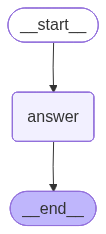

In [10]:
graph

In [12]:
print(graph.invoke({'messages': ['안녕!']}))

answer: 안녕하세요? 무엇을 도와드릴까요?
{'messages': [HumanMessage(content='안녕!', additional_kwargs={}, response_metadata={}, id='1d1c0c34-5ef5-4905-8304-a872b22faa3d'), HumanMessage(content='안녕하세요? 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, id='50aa344f-bbc0-4421-bee6-e8d072e15767')]}


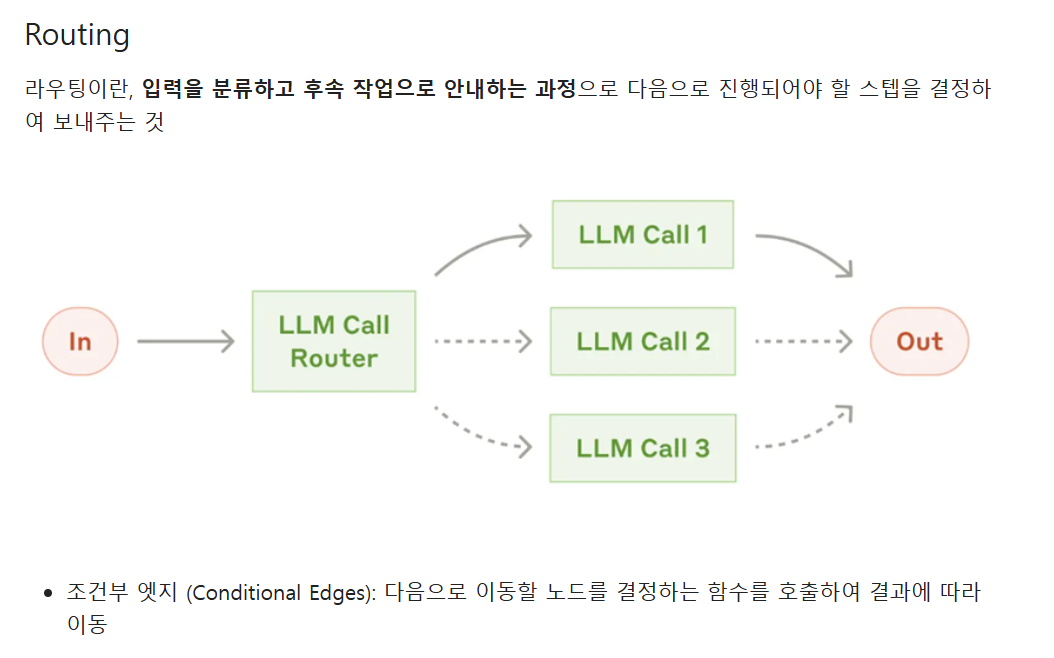

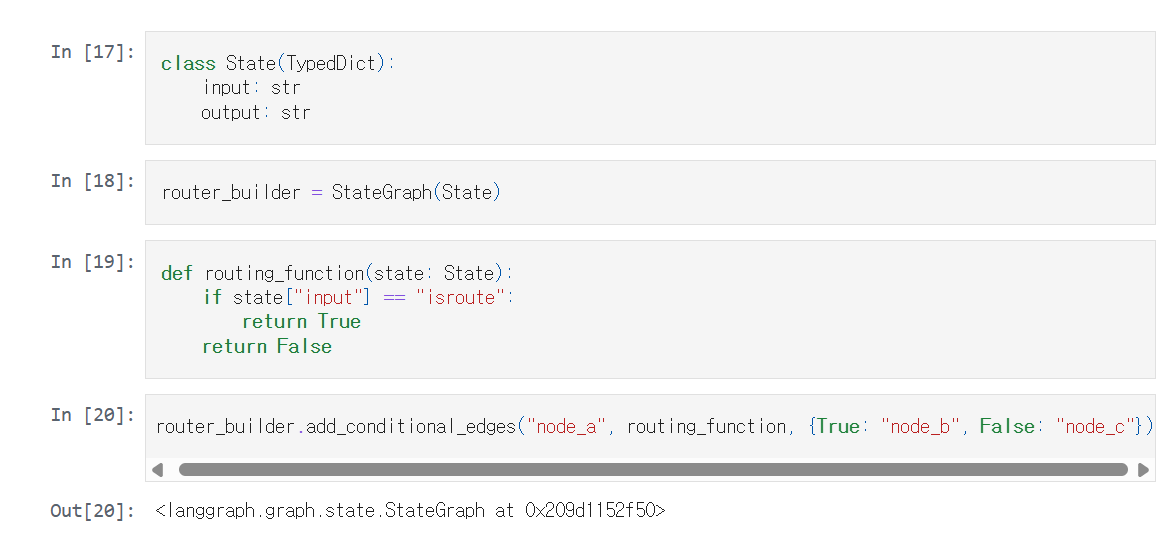